In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import linalg as la

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
deliveries = pd.read_csv('D:\\personal\\kaggle datasets\\ipl\\deliveries.csv')
matches = pd.read_csv("D:\\personal\\kaggle datasets\\ipl\\matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled','stumped']

In [6]:
df = deliveries.groupby(['over']).sum()
df.head()

,match_id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
over,,,,,,,,,,,,
1,2568778,12292,29774,81,481,44,215,28,0,6965,768,7733
2,2539747,12027,29555,0,442,30,228,30,0,8263,730,8993
3,2518785,11899,28938,0,359,29,208,33,0,9223,629,9852
4,2507614,11848,28713,0,295,17,205,45,0,9645,562,10207
5,2504159,11796,28517,0,279,25,155,31,5,9732,495,10227


# Following graph shows Wide Runs per over.It shows that first 3 overs are more responsible for wide runs.

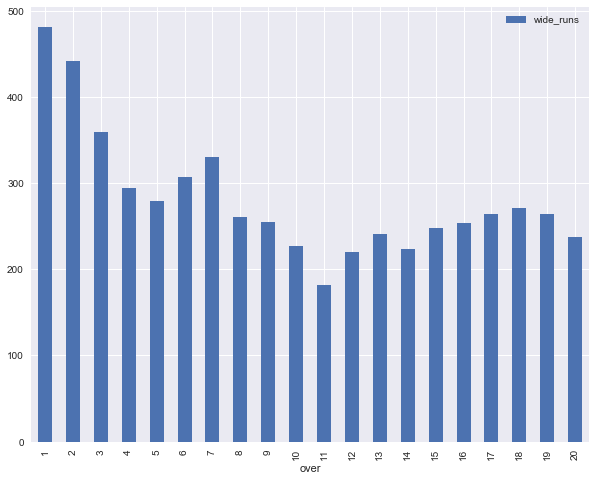

In [7]:
df1 = deliveries.groupby(['over'])['wide_runs'].sum().reset_index()
df1.plot(x='over',y='wide_runs',kind='bar')

# Following graph shows No Balls per over.It shows that last 4 overs are more responsible for No Balls.

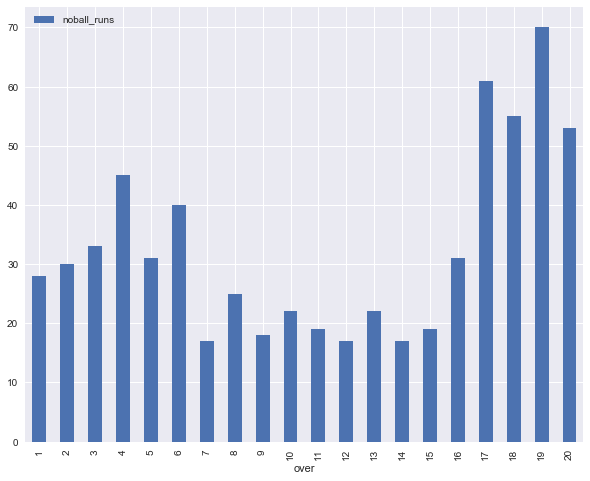

In [8]:
df1 = deliveries.groupby(['over'])['noball_runs'].sum().reset_index()
df1.plot(x='over',y='noball_runs',kind='bar')

#  Total number of matches played by teams

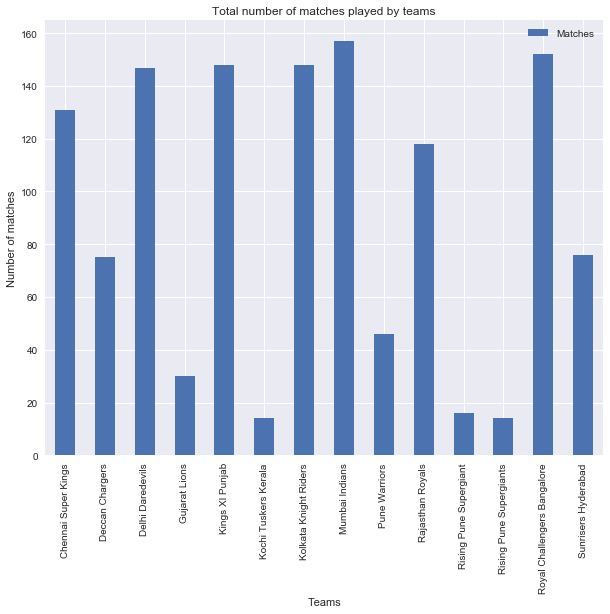

In [9]:
total_matches_played = matches.groupby(['team2'])['id'].count() + matches.groupby(['team1'])['id'].count() 
total_matches_played = pd.DataFrame(total_matches_played)
t1 = total_matches_played.reset_index()
t1.columns = [['Teams','Matches']]
t1.plot(x="Teams",y="Matches",kind='bar',title="Total number of matches played by teams",)
plt.xlabel('Teams')
plt.ylabel('Number of matches')

#  This heatmap shows matches won by teams in all seasons.

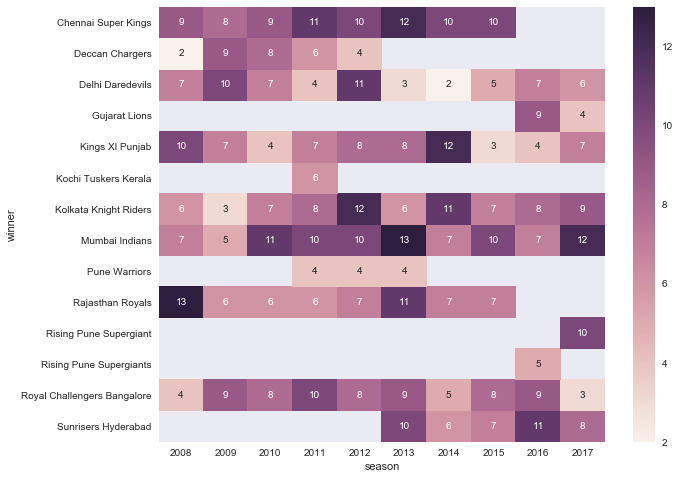

In [10]:
m1=matches.groupby(['season','winner']).count().reset_index()
m2=m1.pivot_table(index='winner',columns='season',values='result')
sns.heatmap(m2,annot=True)

#  Top 10 players who won the most number of Player of the Match

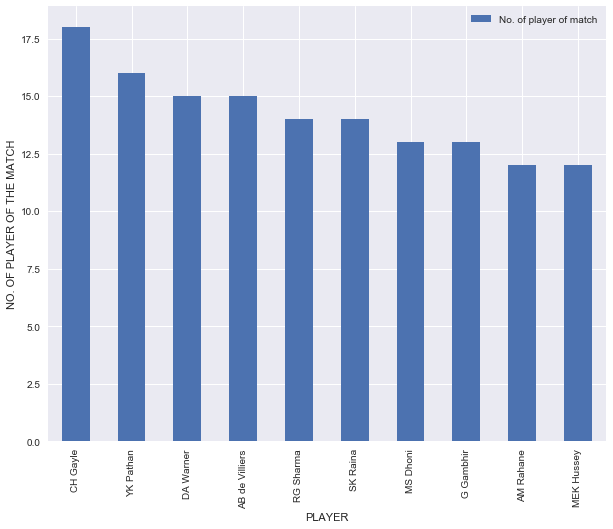

In [11]:
pom = matches.groupby(['player_of_match'])['id'].count().reset_index()
pom=pom.sort_values('id',ascending=False)
col = ['Player','No. of player of match']
pom.columns = col
pom = pom.sort_values('No. of player of match',ascending=False)[:10]
pom.plot(x='Player',y='No. of player of match',kind='bar')
plt.xlabel('PLAYER')
plt.ylabel('NO. OF PLAYER OF THE MATCH')

#  Top 10 Run Scorers

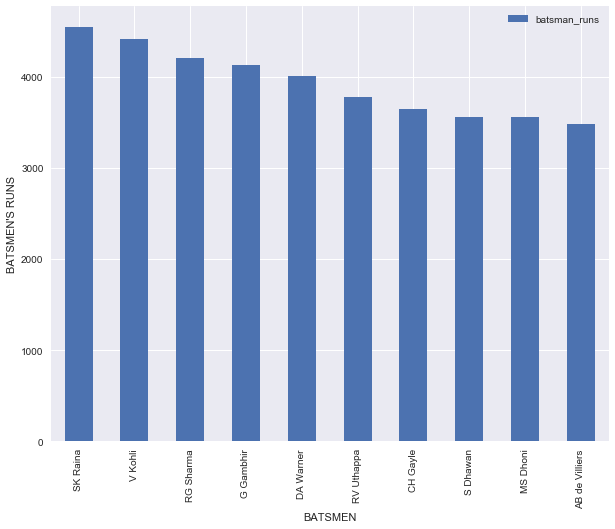

In [12]:
top_batsmen = deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values('batsman_runs',ascending=False)[:10]
top_batsmen.plot(x='batsman',y='batsman_runs',kind='bar')
plt.xlabel('BATSMEN')
plt.ylabel('BATSMEN\'S RUNS')

# Top 10 Wickets takers 

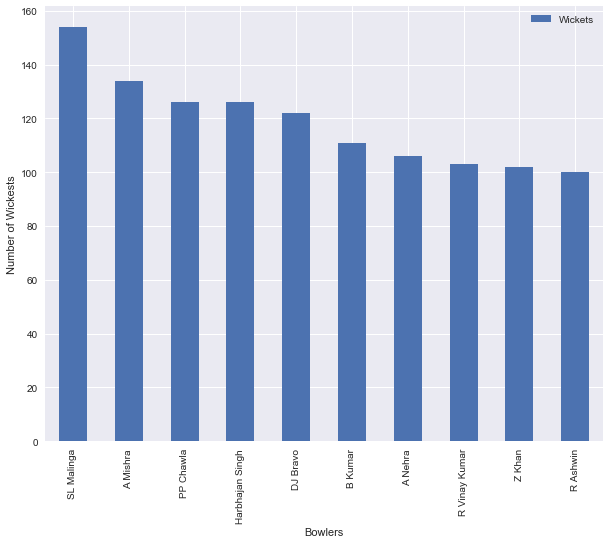

In [13]:
top_wicket = deliveries[deliveries['dismissal_kind'].isin(dismissals)]
top_wicket = top_wicket.groupby(['bowler'])['over'].count().reset_index()
top_wicket.columns = col = ['Bowler','Wickets']
top_wicket = top_wicket.sort_values('Wickets',ascending=False)[:10]
top_wicket.plot(x='Bowler',y='Wickets',kind='bar')
plt.xlabel('Bowlers')
plt.ylabel('Number of Wickests')

#  This heatmap shows different kinds of dismissals

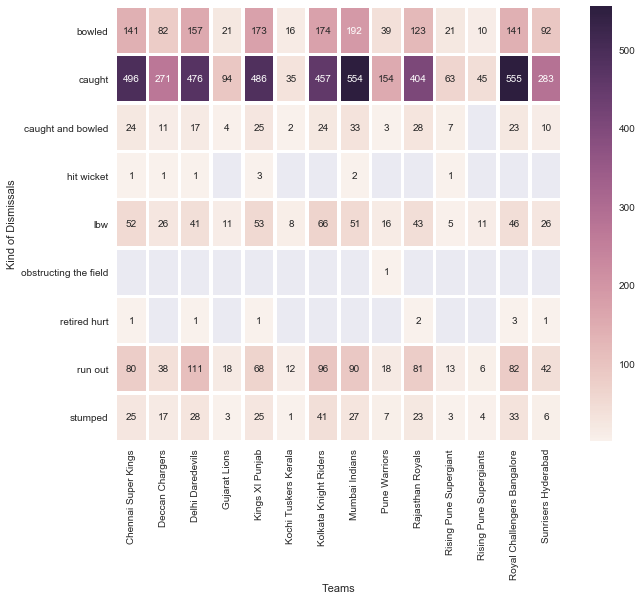

In [14]:
w1=deliveries.groupby(['bowling_team','dismissal_kind']).count().reset_index()
w2=w1.pivot_table(index='dismissal_kind',columns='bowling_team',values='over')
sns.heatmap(w2,annot=True,fmt='.0f',linecolor='white',linewidths=2.5)
plt.xlabel('Teams')
plt.ylabel('Kind of Dismissals')

# These graphs show matches won by teams on Home/Away ground 

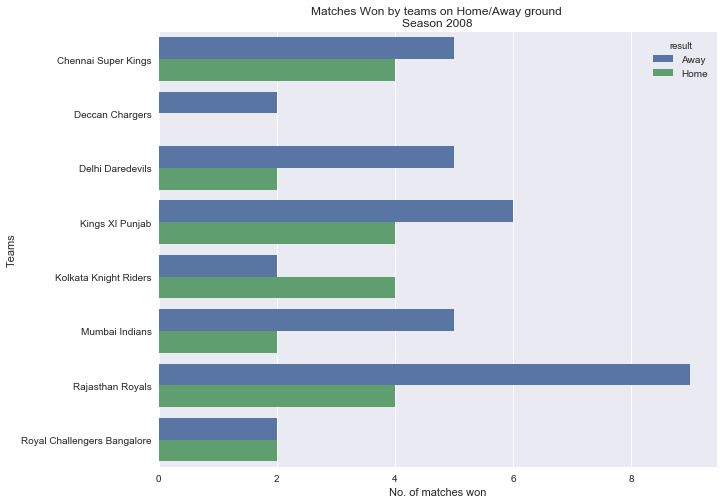

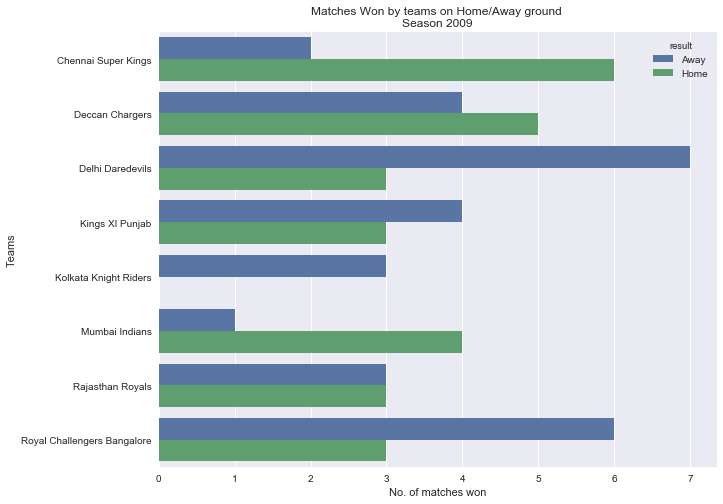

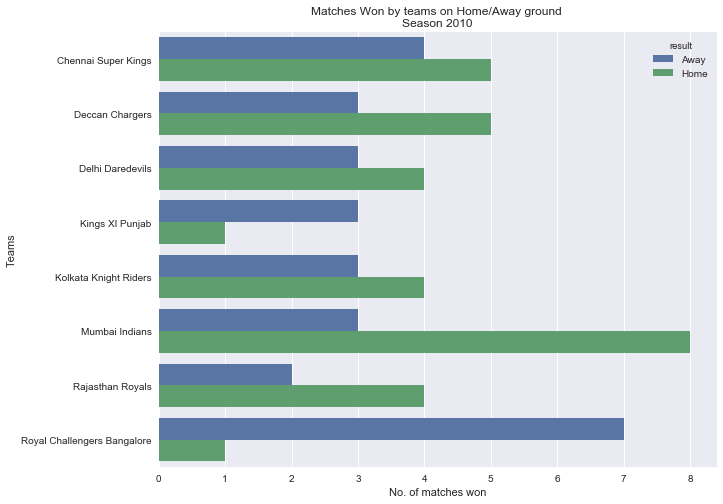

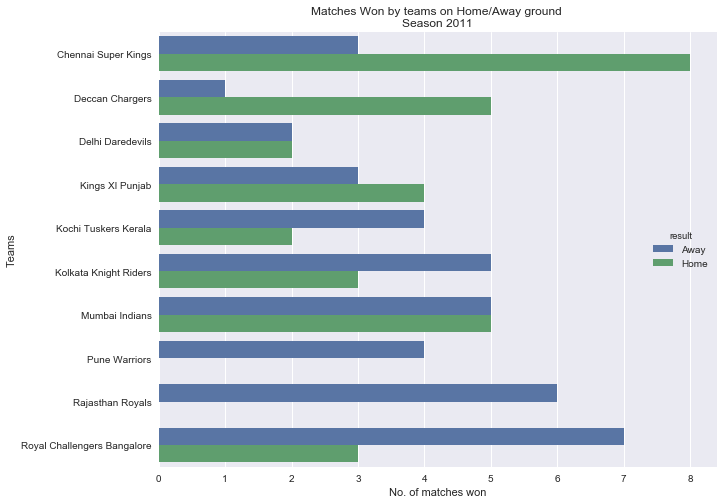

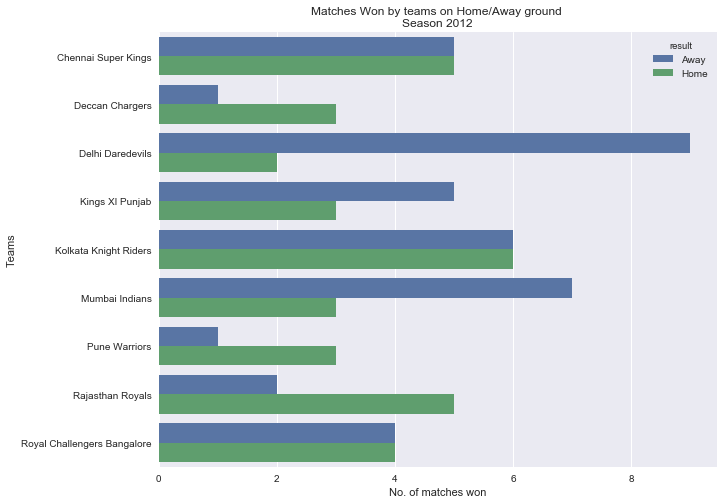

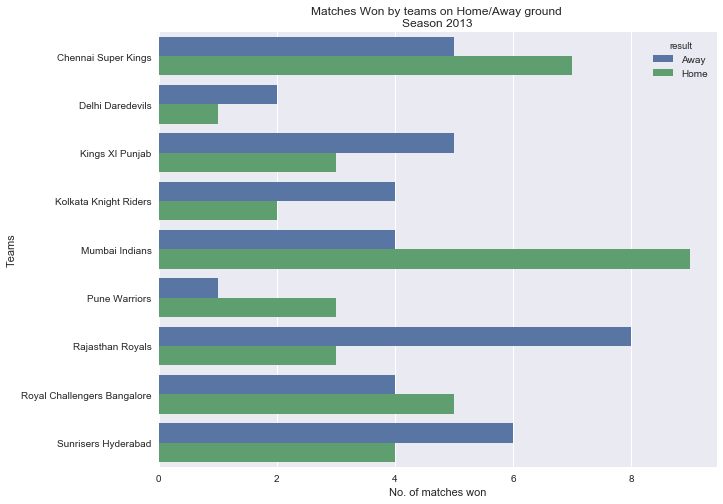

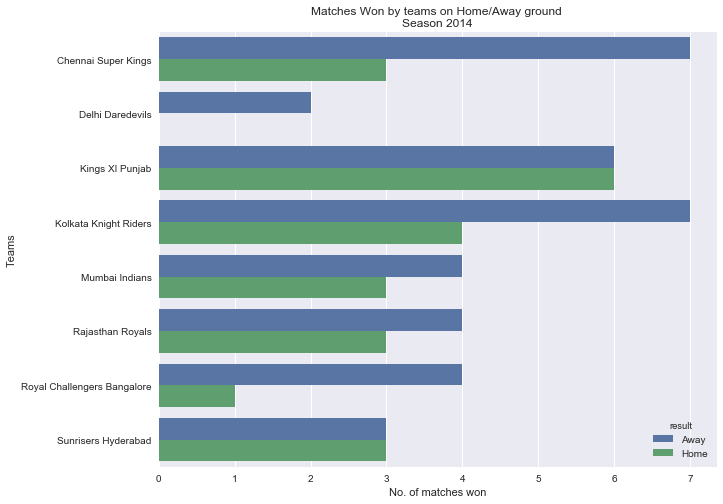

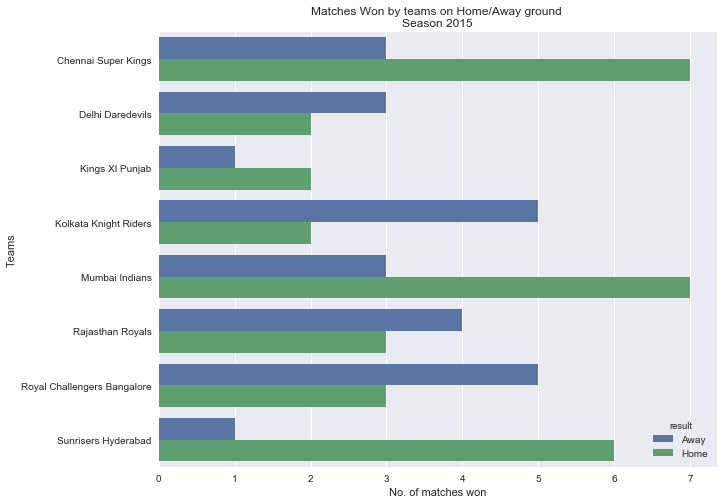

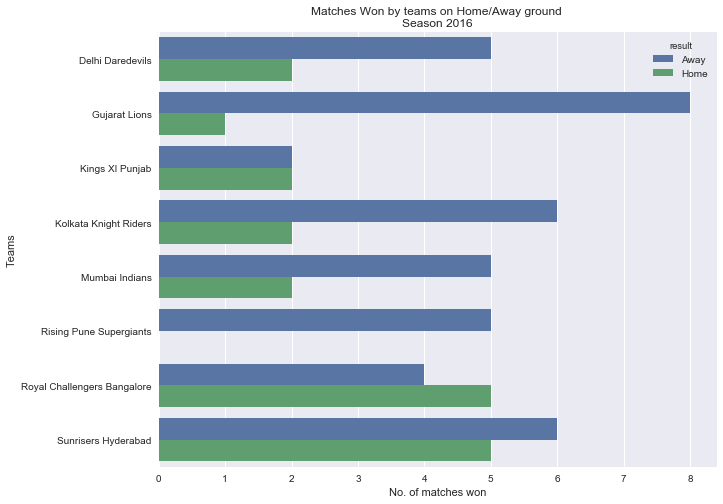

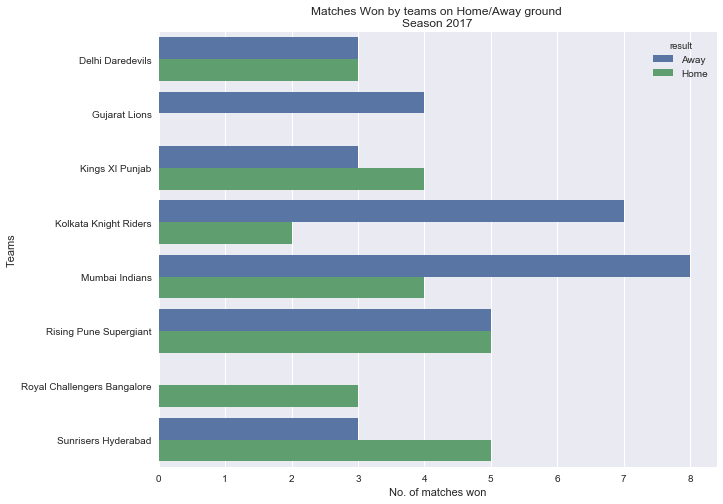

In [15]:
a1 = matches.groupby(['id','season','team1','team2','toss_winner','toss_decision']).winner.value_counts().reset_index(name='count')
a1['result'] = np.where(a1.team1 == a1.winner,'Home','Away')
a2=a1.groupby(['season','winner','result'])['count'].sum().reset_index()
x, y = 2008, 2017
while x <= y:
    a2_x = a2[a2['season']==x]
    sns.barplot(x='count',y='winner',hue='result',data=a2_x)
    plt.title('Matches Won by teams on Home/Away ground \nSeason ' + str(x))
    plt.xlabel('No. of matches won')
    plt.ylabel('Teams')
    plt.show()
    x+=1

#  Most fours 

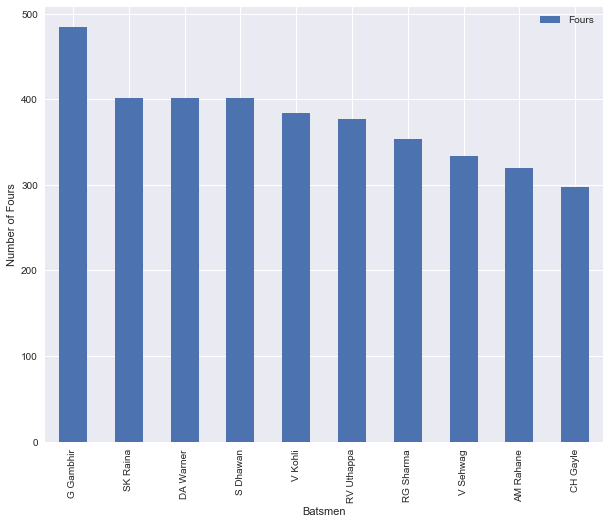

In [16]:
most_fours = deliveries.groupby(['batsman','batsman_runs']).count().reset_index()
most_fours = most_fours[most_fours['batsman_runs']==4]
most_fours= most_fours[['batsman','over']]
most_fours.columns = col =['Batsman','Fours']
most_fours = most_fours.sort_values('Fours',ascending=False)[:10]
most_fours.plot(x='Batsman',y='Fours',kind='bar')
plt.xlabel('Batsmen')
plt.ylabel('Number of Fours')

#  Most Sixes

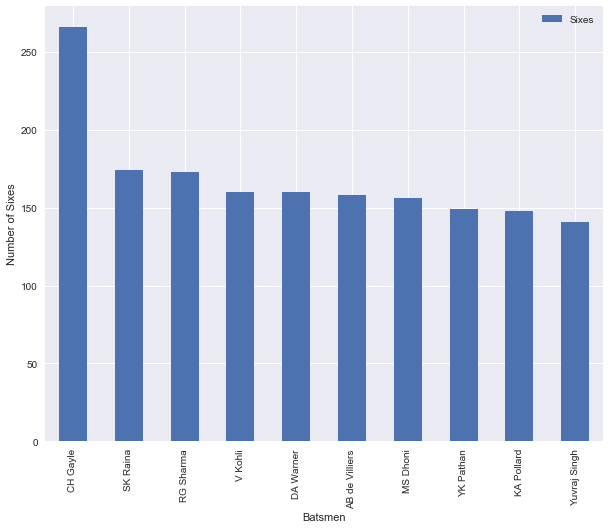

In [17]:
most_sixes = deliveries.groupby(['batsman','batsman_runs']).count().reset_index()
most_sixes = most_sixes[most_sixes['batsman_runs']==6]
most_sixes= most_sixes[['batsman','over']]
most_sixes.columns = col =['Batsman','Sixes']
most_sixes = most_sixes.sort_values('Sixes',ascending=False)[:10]
most_sixes.plot(x='Batsman',y='Sixes',kind='bar')
plt.xlabel('Batsmen')
plt.ylabel('Number of Sixes')

# This function returns player's batting details 

In [18]:
def batsman_stat(player):
    player_stat = deliveries[deliveries['batsman']==player]
    Runs = player_stat[player_stat['extra_runs'] == 0]['batsman_runs'].sum()
    
    Balls = player_stat[player_stat['wide_runs'] == 0]['batsman_runs'].count()
    
    Fours = player_stat[player_stat['batsman_runs'] == 4]['batsman_runs'].count()
    
    Sixes = player_stat[player_stat['batsman_runs'] == 6]['batsman_runs'].count()
    
    Ducks = player_stat.groupby(['match_id','inning'])['batsman_runs'].sum().reset_index()
    Ducks = Ducks[Ducks['batsman_runs']==0]['batsman_runs'].count()
    
    Fiftys = player_stat.groupby(['match_id','inning'])['batsman_runs'].sum().reset_index()
    Fiftys = Fiftys[Fiftys['batsman_runs'] > 50]['batsman_runs'].count()
    
    Hundreds = player_stat.groupby(['match_id','inning'])['batsman_runs'].sum().reset_index()
    Hundreds = Hundreds[Hundreds['batsman_runs'] > 100]['batsman_runs'].count()
    
    Highest = player_stat.groupby(['match_id','inning'])['batsman_runs'].sum().reset_index()
    Highest = Highest['batsman_runs'].max()
    
    SR = Runs/Balls * 100
    summary = pd.DataFrame({'Runs':Runs, 'Balls':Balls, 'Fours':Fours, "Sixes":Sixes, 'Fiftys':Fiftys, 'Hundreds':Hundreds, 'Highest':Highest, 'Strike Rate': SR, 'Ducks':Ducks},columns=['Runs','Balls','Fours','Sixes','Fiftys','Hundreds','Highest','Strike Rate','Ducks'],index=['1'])
    
    print(player+':')
    print(summary)

In [19]:
batsman_stat("V Kohli")

V Kohli:
   Runs  Balls  Fours  Sixes  Fiftys  Hundreds  Highest  Strike Rate  Ducks
1  4412   3405    384    160      33         3      113   129.574156      6


# This function returns player's bowling details 

In [20]:
def bowler_stats(player):
    bowler_stat = deliveries[deliveries['bowler']==player]
    bowler_stat1 = bowler_stat.groupby(['match_id','inning','over'])['ball'].count().reset_index()
    extra_balls = bowler_stat[bowler_stat['wide_runs'] !=0]['wide_runs'].count() + bowler_stat[bowler_stat['noball_runs'] !=0]['noball_runs'].count()
    total_balls = bowler_stat1['ball'].sum()
    bowler_balls = total_balls - extra_balls
    
    bowler_runs = bowler_stat['total_runs'].sum() - (bowler_stat['legbye_runs'].sum() + bowler_stat['bye_runs'].sum())
    
    wickets = bowler_stat[pd.notnull(bowler_stat['player_dismissed'])]['player_dismissed'].count() - bowler_stat[bowler_stat['dismissal_kind'] == 'run out']['ball'].count()
    
    SR = bowler_balls / wickets 
    
    overs = np.ceil(bowler_balls/6)
    ECO = bowler_runs / overs
    
    AVG = bowler_runs / wickets
    
    summary = pd.DataFrame({'Runs':bowler_runs, 'Balls':bowler_balls,'Wickets':wickets, 'Strike Rate':SR, 'Economy':ECO ,'Average':AVG,'Overs':int(overs)},columns=['Balls','Runs','Wickets','Overs','Strike Rate','Economy','Average'],index=['1'])
    print(player+':')
    print(summary)

In [21]:
bowler_stats('B Kumar')

B Kumar:
   Balls  Runs  Wickets  Overs  Strike Rate   Economy    Average
1   1981  2339      111    331    17.846847  7.066465  21.072072


#  This function returns player's batting performance against each team.

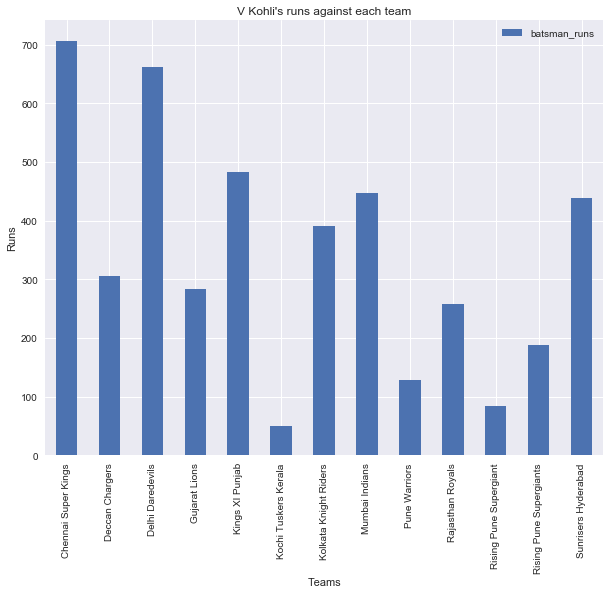

In [22]:
def bat1(player):
    bat1=deliveries[deliveries['batsman']== player]
    bat2 = bat1.groupby('bowling_team')['batsman_runs'].sum().reset_index()
    bat2.plot(x='bowling_team',y='batsman_runs',kind='bar',title=str(player)+'\'s '+'runs against each team' )
    plt.xlabel('Teams')
    plt.ylabel('Runs')

bat1('V Kohli')    

#  This function returns number of wickets taken by a bowler against each team.

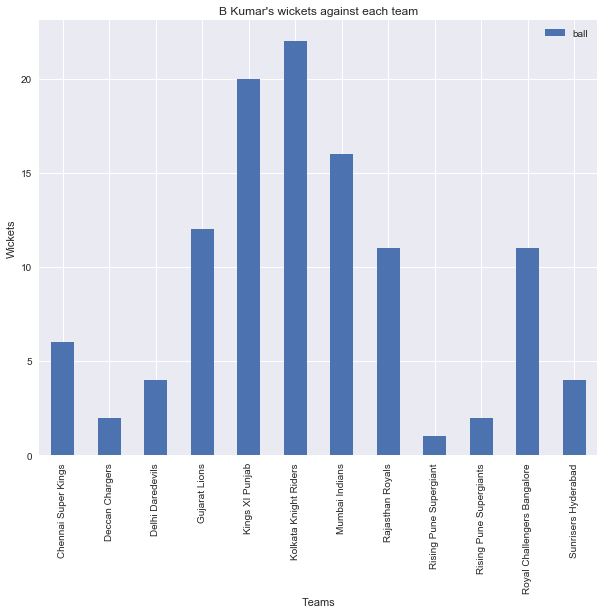

In [23]:
def bow1(player):
    bow1 = deliveries[deliveries['dismissal_kind'].isin(dismissals)]
    bow1 = bow1[bow1['bowler']=='B Kumar']
    bow1 = bow1.groupby(['batting_team'])['ball'].count().reset_index()
    bow1.plot(x='batting_team',y='ball',kind='bar',title=str(player)+'\'s '+'wickets against each team' )
    plt.xlabel('Teams')
    plt.ylabel('Wickets')
    
bow1('B Kumar')    

## Below we have used PCA and Eigenvalue to determine Ranking of Batsmen.

In [24]:
runs = deliveries[deliveries['extra_runs'] == 0]
Batting_Record = runs.groupby(['batsman'])['batsman_runs'].sum().reset_index()
Batting_Record.columns = [['Batsman','Runs']]

balls = deliveries[deliveries['extra_runs'] == 0]
balls = balls.groupby(['batsman'])['batsman_runs'].count().reset_index()
Batting_Record['Balls'] = balls.batsman_runs

Batting_Record['SR'] = np.round(Batting_Record['Runs']/Batting_Record['Balls'] * 100,2)

fours = deliveries[deliveries['batsman_runs'] == 4]
fours = fours.groupby(['batsman'])['batsman_runs'].count().reset_index()
fours.columns = ['Batsman','Fours']
Batting_Record = Batting_Record.merge(fours,how='left',on='Batsman')

sixes = deliveries[deliveries['batsman_runs'] == 6]
sixes = sixes.groupby(['batsman'])['batsman_runs'].count().reset_index()
sixes.columns = ['Batsman','Sixes']
Batting_Record = Batting_Record.merge(sixes,how='left',on='Batsman')

avg_match = deliveries.groupby(['player_dismissed'])['over'].count().reset_index()
avg_match.columns = ['Batsman','Matches']
avg_match.fillna(0,inplace=True)

Batting_Record = Batting_Record.merge(avg_match,how='left',on='Batsman')
Batting_Record['AVG'] = np.round(Batting_Record['Runs'] / Batting_Record['Matches'] * 1,2)

Batting_Record.fillna(0,inplace=True)


In [25]:
Batting_Record.head()   

,Batsman,Runs,Balls,SR,Fours,Sixes,Matches,AVG
0,A Ashish Reddy,280,191,146.60,16.0,15.0,15.0,18.67
1,A Chandila,4,7,57.14,0.0,0.0,0.0,0.00
2,A Chopra,53,70,75.71,7.0,0.0,6.0,8.83
3,A Choudhary,25,20,125.00,1.0,1.0,1.0,25.00
4,A Flintoff,62,50,124.00,5.0,2.0,2.0,31.00


In [26]:
Batting_Record_std = StandardScaler().fit_transform(Batting_Record.iloc[:,1:])

In [27]:
pca = PCA(n_components=3)

In [28]:
pca.fit_transform(Batting_Record_std)

array([[  2.46373432e-03,   1.05810316e+00,   3.00981917e-01],
       [ -1.75498194e+00,  -1.38050905e+00,   2.11004401e-01],
       [ -1.21245113e+00,  -6.63550891e-01,  -1.32351098e-01],
       ..., 
       [ -1.72504251e+00,  -1.54133717e+00,  -2.13321409e-01],
       [  6.75563809e+00,  -1.13683921e+00,   7.54115065e-01],
       [ -9.19973878e-01,  -5.96371540e-01,   9.16847212e-02]])

In [29]:
np.round(pca.explained_variance_ratio_,decimals=3)*100

array([ 75.8,  15.6,   5.4])

     This shows that almost 76% of information is obtained from 1st Principle component.

In [41]:
A = Batting_Record.corr()
A

,Runs,Balls,SR,Fours,Sixes,Matches,AVG
Runs,1.000000,0.995541,0.302070,0.982018,0.918657,0.971525,0.586164
Balls,0.995541,1.000000,0.285279,0.982917,0.887239,0.974990,0.582146
SR,0.302070,0.285279,1.000000,0.288249,0.319677,0.310245,0.566044
Fours,0.982018,0.982917,0.288249,1.000000,0.853332,0.958847,0.568063
Sixes,0.918657,0.887239,0.319677,0.853332,1.000000,0.878480,0.544555
Matches,0.971525,0.974990,0.310245,0.958847,0.878480,1.000000,0.546657
AVG,0.586164,0.582146,0.566044,0.568063,0.544555,0.546657,1.000000


In [46]:
evals, evecs = la.eig(A)
evecs

array([[ 0.42804238,  0.14727006,  0.03712008,  0.042662  ,  0.21101503,
         0.79823515, -0.33194367],
       [ 0.42520246,  0.15910104,  0.01053584,  0.20374913,  0.08628254,
        -0.56341043, -0.65374997],
       [ 0.18570056, -0.79872146,  0.56515082,  0.07236452,  0.04430328,
        -0.00669107, -0.03032676],
       [ 0.41956861,  0.15617583,  0.02755837,  0.37128077,  0.50209422,
        -0.14908094,  0.62180277],
       [ 0.39964501,  0.10350886,  0.12930775, -0.8762688 ,  0.05075864,
        -0.14528151,  0.14601067],
       [ 0.41954203,  0.14959744,  0.12448513,  0.21004367, -0.82925671,
         0.04474752,  0.22873819],
       [ 0.29954703, -0.50750178, -0.80382781, -0.04018521, -0.06102023,
         0.00322089,  0.03500987]])

        First principle component for batsmen is calculated with the help of first eigen vector
        L1 = 0.428*Runs + 0.147*Balls + 0.0375*SR + 0.0426*Fours + 0.211*Sixes + 0.798*Matches - 0.331*AVG,

In [32]:
Ranking = Batting_Record.iloc[:,0:1]
Batting_Record = Batting_Record.iloc[:,1:]

In [33]:
B=0
for i in range(0,7):
    A = evecs[0][i] * Batting_Record.iloc[:,i:i+1]
    B += A.values
B = pd.DataFrame(B,columns=['Points'])

In [34]:
Ranking = Ranking.join(B)

Ranking.sort_values('Points',ascending=False,inplace=True)

Ranking.index = np.arange(1, len(Ranking) + 1)

In [47]:
Ranking.head(15)

,Batsman,Points
1,SK Raina,2563.451467
2,V Kohli,2520.732755
3,RG Sharma,2405.907103
4,G Gambhir,2369.596063
5,DA Warner,2234.167338
6,RV Uthappa,2163.632765
7,S Dhawan,2050.235579
8,CH Gayle,2021.082584
9,MS Dhoni,2005.480074
10,AB de Villiers,1930.355963


    We can calculate ranking for bowlers as well by following above method.